# Árboles de decisión

En este ejemplo se va a utilizar el dataset `heart_failure_clinical_records_dataset.xlsx`.

Las enfermedades cardiovasculares (ECV) son la causa número 1 de muerte a nivel mundial,llevándose un estimado de 17,9 millones de vidas cada año,lo que representa el 31% de todas las muertes en todo el mundo.
La insuficiencia cardíaca es un evento común causado por las ECV y este conjunto de datos contiene 12 características que se pueden utilizar para predecir la mortalidad por insuficiencia cardíaca (299 casos).

La mayoría de las enfermedades cardiovasculares pueden prevenirse abordando los factores de riesgo conductuales, como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol utilizando estrategias para toda la población.

Las personas con enfermedad cardiovascular o que están en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo tempranos en los que un modelo de aprendizaje automático puede ser de gran ayuda.

**Citation**

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).

**Descripcion de los atributos**
- Edad: en años (enteros)
- Anemia: disminución de glóbulos o hemoglobina (boolean)
- Creatinine_phosphokinase: Nivel de la enzima CPK en la sangre (mcg/L)
- Diabetes:Si el paciente tiene diabetes (booleano)
- Ejection_fraction: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
- high_blood_pressure: Si el paciente tiene hipertensión (boolean)
- Plaquetas: Plaquetas en la sangre (kiloplaquetas/mL)
- serum_creatinine:Nivel de creatinina sérica en la sangre (mg/dL)
- serum_sodium:Nivel de sodio sérico en la sangre (mEq/L)
- sexo: Mujer u hombre (binario)
- smoking: If the patient smokes or not (boolean)
- Hora: Período de seguimiento (días)
- DEATH_EVENT: Si el paciente falleció durante el período de seguimiento (booleano)


En cuanto al desequilibrio del conjunto de datos, los pacientes sobrevivientes (evento de muerte = 0) son 203, mientras que los pacientes muertos (evento de muerte = 1) son 96. En términos estadísticos, hay un 32,11% de positivos y un 67,89% de negativos.

`Vamos a costruir un modelo para predecir si un paciente puede fallecer durante el periodo de seguimiento`

Emplearemos el clasificador de árboles de decisión **(DecisionTreeClassifier)** sin optimizar y optimizado.

***Criterio:*** este parámetro determina cómo se medirá la **impureza de una división**. El valor predeterminado es **"gini"**, pero también puede utilizar **"entropía"** como métrica para el divisor de la impureza, así es como, el árbol de decisiones busca las características para una división. El valor predeterminado se establece en "mejor".


**Índice de Gini**

Un criterio para minimizar la probabilidad de clasificación errónea.


**Entropía**

Una forma de medir la impureza, a través del grado de desorden de un sistema.

### Para implementar el árbol de decisiones, pasaremos por las siguientes dos fases:

- **Fase de construcción.** 
    - Preprocesar previamente el conjunto de datos (anális tabular - gráficas). 
    - Dividir el conjunto de datos en datos de entenamiento y datos de prueba.
    - Entrenar el clasificador.

- **Fase operativa.** 
    - Realizar predicciones.
    - Generar la matriz de confusión.
    - Calcular la precisión del modelo.

## Inicio

In [357]:
#Cargar las librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [358]:
# Cargar los datos
df = pd.read_excel ("./heart_failure_clinical_records_dataset.xlsx")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,19,130,1,0,4,1
1,55,0,7861,0,38,0,26335803,11,136,1,0,6,1
2,65,0,146,0,20,0,162000,13,129,1,1,7,1
3,50,1,111,0,20,0,210000,19,137,1,0,7,1
4,65,1,160,1,20,0,327000,27,116,0,0,8,1


In [359]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,4.662274e+02,4.948431e+03,40.0,51.0,60.0,70.0,60667.0
anaemia,299.0,4.314381e-01,4.961073e-01,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,5.818395e+02,9.702879e+02,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,4.180602e-01,4.940671e-01,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,3.808361e+01,1.183484e+01,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,3.511706e-01,4.781364e-01,0.0,0.0,0.0,1.0,1.0
platelets,299.0,2.443328e+06,7.229746e+06,25100.0,212500.0,262000.0,332000.0,26335803.0
serum_creatinine,299.0,2.019064e+01,3.529940e+01,1.0,7.0,11.0,15.0,183.0
serum_sodium,299.0,1.366254e+02,4.412477e+00,113.0,134.0,137.0,140.0,148.0
sex,299.0,6.488294e-01,4.781364e-01,0.0,0.0,1.0,1.0,1.0


<Axes: >

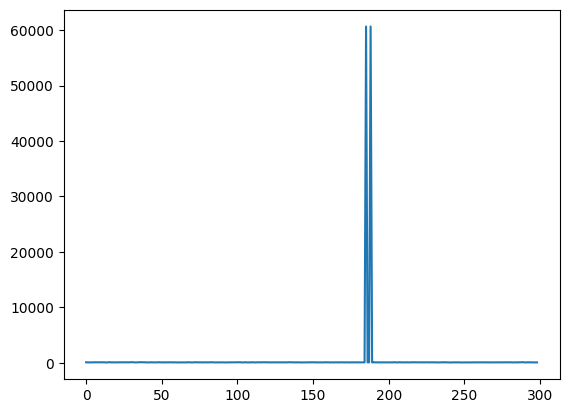

In [360]:
df.age.plot()

In [361]:
#Cambiamos el valor de 60667 por 61
df["age"]=df["age"].replace({60667:61})
df.age.unique()

array([75, 55, 65, 50, 90, 60, 80, 62, 45, 49, 82, 87, 70, 48, 68, 53, 95,
       58, 94, 85, 69, 72, 51, 57, 42, 41, 67, 79, 59, 44, 63, 86, 66, 43,
       46, 61, 81, 52, 64, 40, 73, 77, 78, 54, 47, 56])

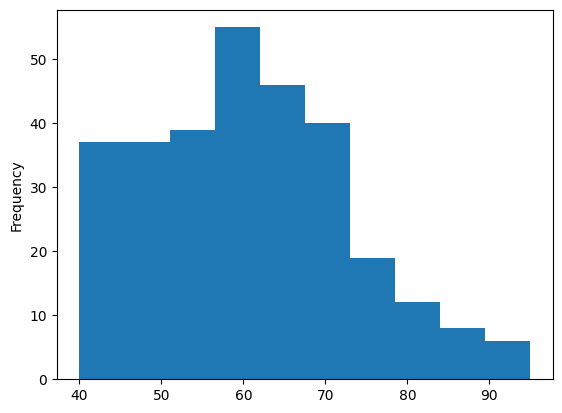

In [362]:
df.age.plot(kind="hist");

In [363]:
df.age.describe()

count    299.000000
mean      60.836120
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

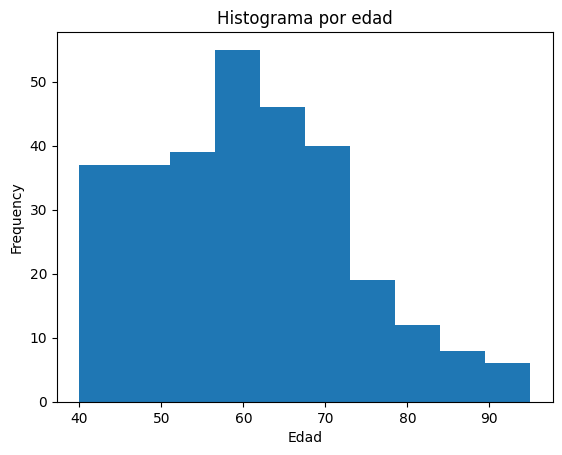

In [364]:
df["age"].plot(kind="hist",title="Histograma por edad",xlabel="Edad",grid=False);

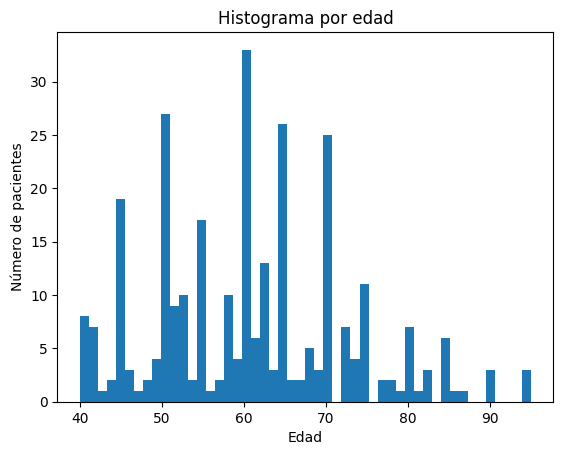

In [365]:
plt.hist(df["age"], bins=50);
plt.xlabel("Edad");
plt.ylabel("Número de pacientes");
plt.title("Histograma por edad");

In [366]:
df.smoking.value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

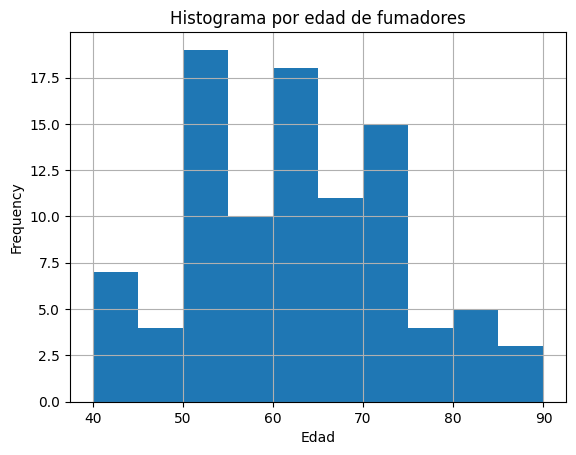

In [367]:
df1 = df[df["smoking"]==1]
df1["age"].plot(kind="hist",title="Histograma por edad de fumadores",xlabel="Edad",grid=True);

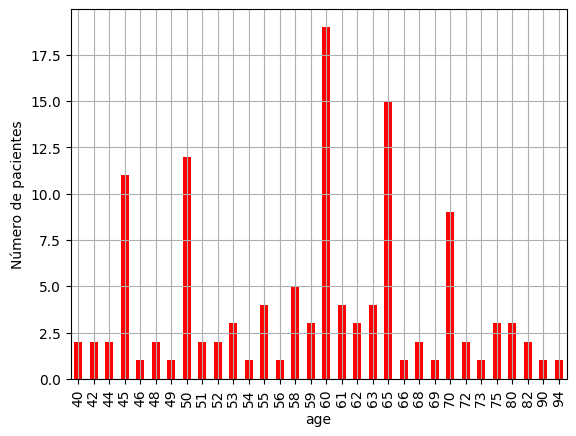

In [368]:
df2 = df[df["diabetes"]==1]
cuenta_edad_diabetes =df2.groupby("age")["smoking"].count()
plt.ylabel("Número de pacientes")
cuenta_edad_diabetes.plot(kind="bar",color="red",grid=True);

Dividimos los datos en datos de ``Entrenamiento`` y datos de ``Prueba``

In [369]:
#Separamos variables pendiente e independientes
X = df.drop(["DEATH_EVENT"],axis=1)
y = df["DEATH_EVENT"]

In [370]:
#Dividir los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0) #en X me ponen 75% en entreamiento y 25% en prueba
y_test

206    0
188    0
12     1
219    0
237    0
      ..
156    0
226    0
272    0
27     1
144    1
Name: DEATH_EVENT, Length: 75, dtype: int64

In [371]:
#Aplicamos el modelo
clasificar=DecisionTreeClassifier(criterion="gini",random_state=0)
clasificar.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [372]:
y_pred=clasificar.predict(X_test)
score=clasificar.score(X_test,y_test)
score*100

76.0

In [373]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[42,  6],
       [12, 15]])

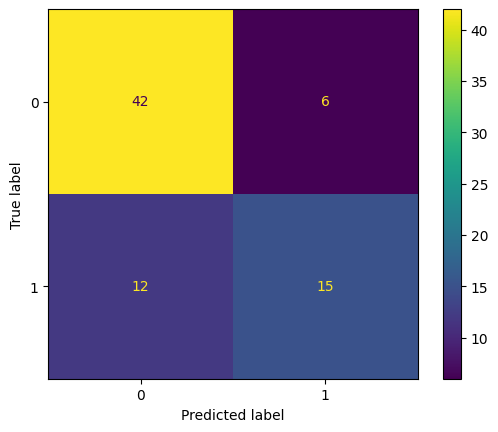

In [374]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

Entropia

In [375]:
clasificar=DecisionTreeClassifier(criterion="entropy",random_state=1230)
clasificar=clasificar.fit(X_train,y_train)
y_pred=clasificar.predict(X_test)
score=clasificar.score(X_test,y_test)
score*100

80.0

Matriz de confusion ---> métrica

In [376]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  7],
       [ 8, 19]])

In [377]:
(41+19)/75

0.8

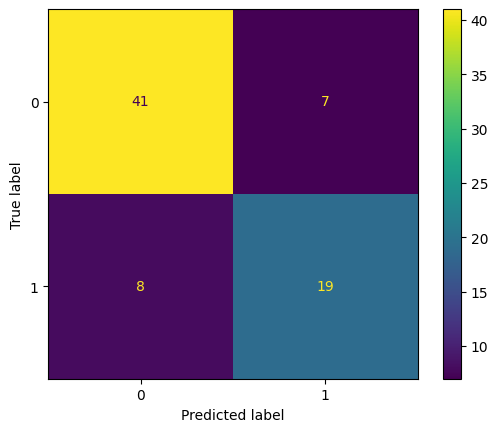

In [378]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [379]:
clasificar=DecisionTreeClassifier(criterion="log_loss",random_state=0)
clasificar=clasificar.fit(X_train,y_train)
y_pred=clasificar.predict(X_test)
score=clasificar.score(X_test,y_test)
score*100

80.0

In [380]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  7],
       [ 8, 19]])

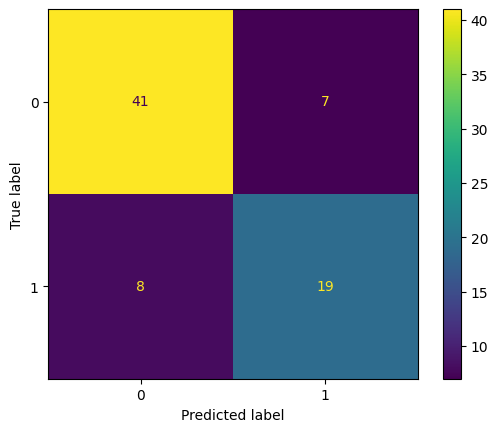

In [381]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);